# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [46]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline

### Step 2: Read in your data set 

In [25]:
#Read in data from source 
df_raw = pd.read_csv('admissions.csv')
df_raw.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [26]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400

#### Question 2. Create a summary table

In [27]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: The scale of the numbers is very different - GRE goes from 220 to 800 while GPA is only from 2.26 to 4.

#### Question 4. Drop data points with missing data


In [29]:
df_raw.dropna(inplace = True)
df_raw.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

In [32]:
df_raw.isnull().sum()

admit       0
gre         0
gpa         0
prestige    0
dtype: int64

Answer: The sum of nulls is 0

#### Question 6. Create box plots for GRE and GPA

{'boxes': [<matplotlib.lines.Line2D at 0x25a0af8c9b0>],
 'caps': [<matplotlib.lines.Line2D at 0x25a0afa2400>,
 'fliers': [<matplotlib.lines.Line2D at 0x25a0afaa0b8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x25a0afa2c50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x25a0af8cb00>,
  <matplotlib.lines.Line2D at 0x25a0af8cf98>]}

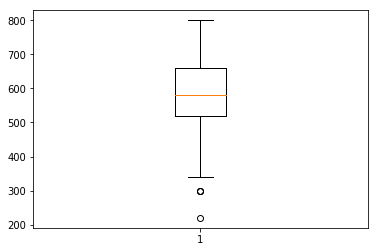

In [36]:
plt.boxplot(df_raw['gre'])

{'boxes': [<matplotlib.lines.Line2D at 0x25a0b023cf8>],
 'caps': [<matplotlib.lines.Line2D at 0x25a0b02c748>,
 'fliers': [<matplotlib.lines.Line2D at 0x25a0b034400>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x25a0b02cf98>],
 'whiskers': [<matplotlib.lines.Line2D at 0x25a0b023e48>,
  <matplotlib.lines.Line2D at 0x25a0b02c320>]}

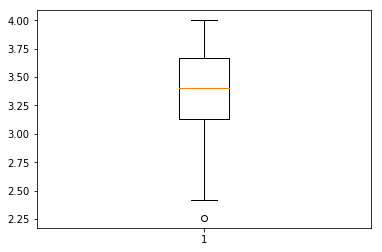

In [37]:
plt.boxplot(df_raw['gpa'])

#### Question 7. What do this plots show?

Answer: From top to bottom: max, 75th percentile (the top of the interquartile range), mean, 25th percentile (bottom of interquartile range), min, and outliers either side.

#### Question 8. Describe each distribution 

(array([ 1.,  0.,  3.,  0.,  8.,  8., 18., 10., 29., 21., 24., 51., 28.,
        53., 21., 43., 22., 22.,  5., 30.]),
 array([220., 249., 278., 307., 336., 365., 394., 423., 452., 481., 510.,
        539., 568., 597., 626., 655., 684., 713., 742., 771., 800.]),
 <a list of 20 Patch objects>)

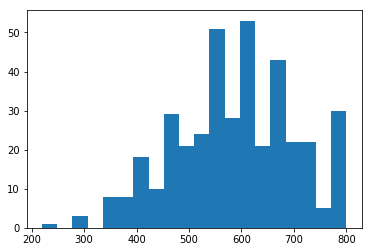

In [44]:
plt.hist(df_raw['gre'],bins = 20) # Sort of a normal distribution, slightly left skewed

(array([ 1.,  2.,  2.,  2.,  8.,  8., 13., 19., 23., 19., 32., 25., 44.,
        32., 29., 36., 16., 23., 17., 46.]),
 array([2.26 , 2.347, 2.434, 2.521, 2.608, 2.695, 2.782, 2.869, 2.956,
        3.043, 3.13 , 3.217, 3.304, 3.391, 3.478, 3.565, 3.652, 3.739,
        3.826, 3.913, 4.   ]),
 <a list of 20 Patch objects>)

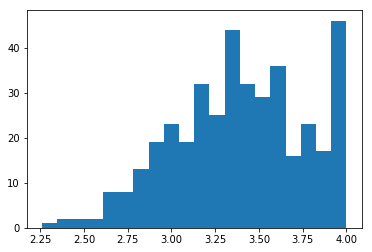

In [43]:
plt.hist(df_raw['gpa'],bins = 20) # As above sort of a normal distribution, slightly left skewed

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: Not exactly, no. They aren't terrible but they could be better. Both are slightly left skewed. Both have slight clusters around the max values.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: I don't think logging the values would help in this case. I also don't think it would be worth removing the very small number of outliers either. So I'm going with no.

#### Question 11. Which of our variables are potentially colinear? 

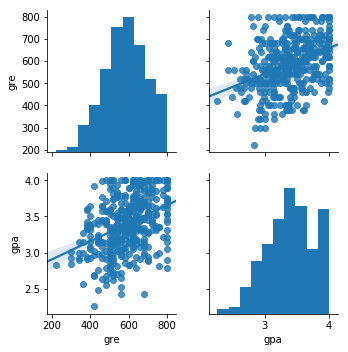

In [54]:
sns.pairplot(df_raw[['gre','gpa']], kind = 'reg')

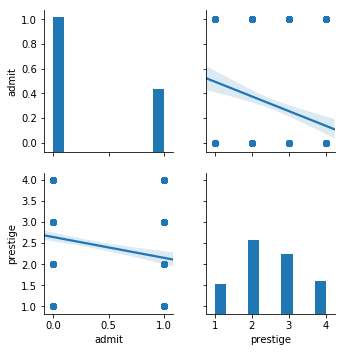

In [56]:
sns.pairplot(df_raw[['admit','prestige']], kind = 'reg')

#### Question 12. What did you find?

Answer: GPA and GRE definitely have a positive correlation but there is quite a bit of variance.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: The plan would be to determine if admission rates were consistent across the different levels of prestige, although using scatter plots is pretty limited as we're not dealing with continuous variables.

#### Question 14. What is your hypothesis? 

Answer: My hypothesis is that more prestigeous schools are harder to get into, and so would have lower admission rates.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

In [60]:
df_raw = df_raw.dropna()
df_raw.dropna(inplace = True)

#### 2. Bonus: Log transform the skewed data

In [65]:
df_log = df_raw[['gre','gpa']].apply(np.log)
df_log.describe()

,gre,gpa
count,397.000000,397.000000
mean,6.355560,1.215019
std,0.210156,0.114971
min,5.393628,0.815365
25%,6.253829,1.141033
50%,6.363028,1.223775
75%,6.492240,1.300192
max,6.684612,1.386294


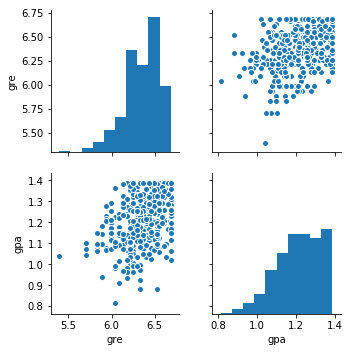

In [66]:
sns.pairplot(df_log[['gre','gpa']])

In [ ]:
# Not sure if it's much of an improvement?

#### 3. Advanced: Impute missing data

In [70]:
df = pd.read_csv('admissions.csv')
df.isnull().sum()

admit       0
gre         2
gpa         2
prestige    1
dtype: int64

In [72]:
df['gre'].fillna(df['gre'].mean(), inplace=True)
df['gpa'].fillna(df['gpa'].mean(), inplace=True)
df['prestige'].fillna(0, inplace=True)

In [74]:
df.isnull().sum()

admit       0
gre         0
gpa         0
prestige    0
dtype: int64